In [1]:
# importing necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# About Dataset
The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

## Columns
1. Pregnancies : Number of times pregnant
2. Glucose : Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure : Diastolic blood pressure (mm Hg)
4. SkinThickness : Triceps skin fold thickness (mm)
5. Insulin : 2-Hour serum insulin (mu U/ml)
6. BMI : Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction : Diabetes pedigree function
8. Age : Age (years)
9. Outcome : Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [2]:
# Loading the csv file
df=pd.read_csv("diabetes.csv")
# Printing first 5 rows
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Printing dimension of dataset (Rows, Columns)
df.shape

(768, 9)

In [4]:
# Information about Null Values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


We can see that all columns have 768 values means there are no Null value in any columns.

# Data Visualisation

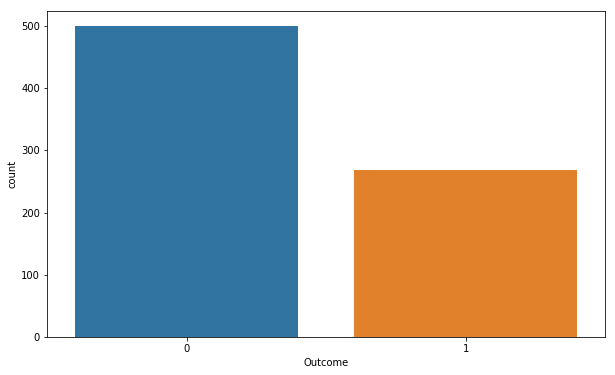

In [5]:
# Count Plot
plt.figure(figsize=(10,6))
sns.countplot(df["Outcome"])

We can see that 500 patients have no diabetes(Indicated by 0) and rest of them have diabetes(Indicated by 1)

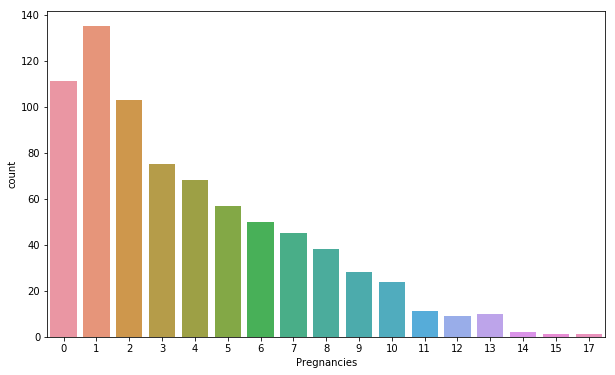

In [6]:
plt.figure(figsize=(10,6))
sns.countplot(df["Pregnancies"])

From the plot we can see that there is more cases where number of times pregnant is 1 followed by 0 then by 2 and so on....

Text(0.5, 0, '(Value1,Value2) where Value1 is Number of times pregnant and Value2 is Outcome')

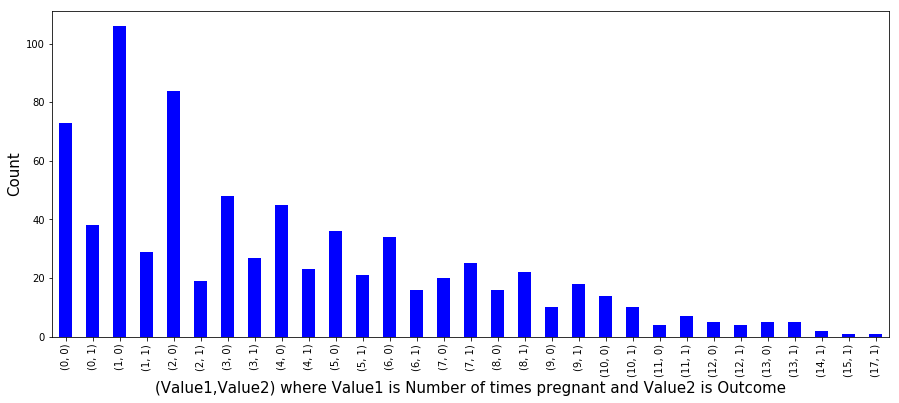

In [7]:
plt.figure(figsize=(15,6))
df.groupby(["Pregnancies","Outcome"]).size().plot(kind="bar", color="b")
plt.ylabel("Count", fontsize=15)
plt.xlabel("(Value1,Value2) where Value1 is Number of times pregnant and Value2 is Outcome", fontsize=15)

From the plot we can say that chance of diabetes is less if the number of times pregnant is from 0 to 6, chance of diabetes is high if the number of times pregnant is for 7, 8 and 9. For 10, 11, 12 and 13 sometime chances are hign or sometime chances are low. For 14, 15 and 17 there is only chance of diabetes.

Text(0.5, 0, 'Age')

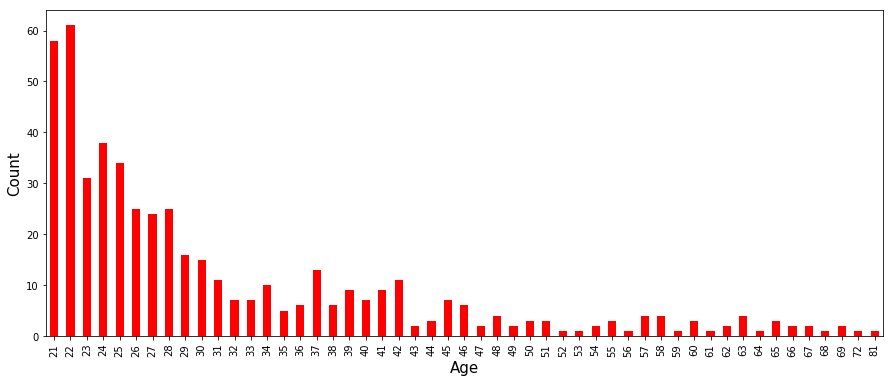

In [8]:
plt.figure(figsize=(15,6))
df[df["Outcome"]==0].groupby("Age").size().plot(kind="bar", color="r")
plt.ylabel("Count", fontsize=15)
plt.xlabel("Age", fontsize=15)

This plot shows the number of persons with no diabetes in a particular age.

From the plot, we can say that there is less chance to have diabetes with young age and while the age increases the number decreases

Text(0.5, 0, 'Age')

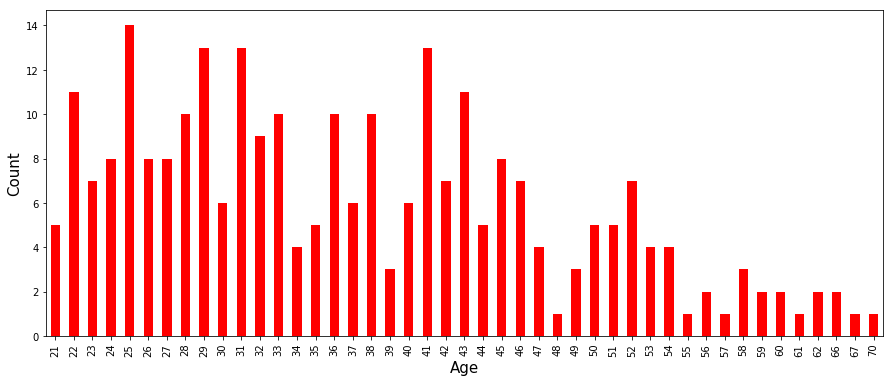

In [9]:
plt.figure(figsize=(15,6))
df[df["Outcome"]==1].groupby("Age").size().plot(kind="bar", color="r")
plt.ylabel("Count", fontsize=15)
plt.xlabel("Age", fontsize=15)

This plot shows the number of persons with diabetes in a particular age

We can see that there is some ages where number of persons with diabetes is more and with age greater than 54 there are less number of person who suffering from diabetes as compaired with younger age

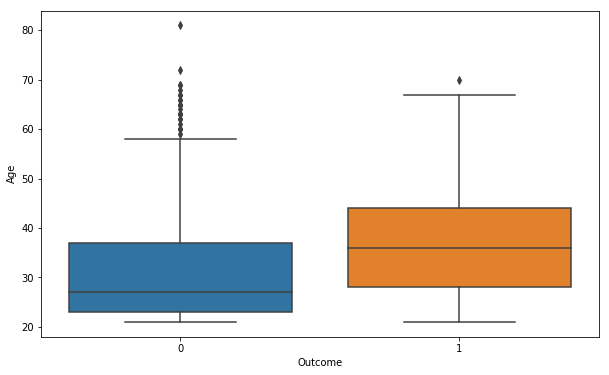

In [10]:
# Box plot
plt.figure(figsize=(10,6))
sns.boxplot(df["Outcome"], df["Age"])

From the plot we can say that persons with age less than 28 have no diabetes, we can say that chance of diabetes increases with age

# Creating Model

In [11]:
# Splitting the Dataset into training and testing part

x=df.drop("Outcome", axis=1)
y=df['Outcome']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(614, 8)
(614,)
(154, 8)
(154,)


In [12]:
# Standardising the data
# Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated

scaler = StandardScaler()  
scaler.fit(x_train)

x_train = scaler.transform(x_train)  
x_test = scaler.transform(x_test)

In [13]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Creating object
model=LogisticRegression()

# Training the model
model.fit(x_train,y_train)

# Prediction
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
      dtype=int64)

In [14]:
print("Accuracy of Logistic Regression is {:.2f} %" .format(model.score(x_test,y_test)*100))

Accuracy of Logistic Regression is 79.87 %


# Feature Selection

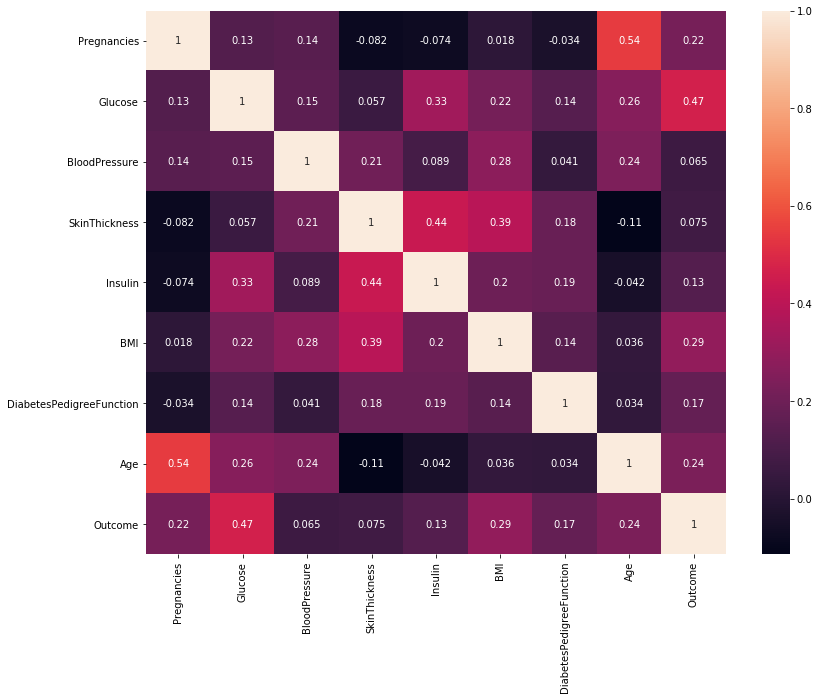

In [15]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), annot=True)

From the Heatmap we can say that BloodPressure and SkinThickness are very less correlated with Outcome so we can remove them.

In [16]:
df.drop(["BloodPressure","SkinThickness"], axis=1, inplace=True)
df.head(5)

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1


# Creating Model With Selected Features

In [17]:
# Splitting the Dataset into training and testing part

x1=df.drop("Outcome", axis=1)
y1=df['Outcome']

x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=5)
print(x1_train.shape)
print(y1_train.shape)
print(x1_test.shape)
print(y1_test.shape)

# Standardising the data
# Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated

scaler = StandardScaler()  
scaler.fit(x1_train)

x1_train = scaler.transform(x1_train)  
x1_test = scaler.transform(x1_test)

# Logistic Regression model
from sklearn.linear_model import LogisticRegression

# Creating object
model1=LogisticRegression()

# Training the model
model1.fit(x1_train, y1_train)

# Prediction
y1_pred=model1.predict(x1_test)
y1_pred

(614, 6)
(614,)
(154, 6)
(154,)


array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
      dtype=int64)

In [18]:
print("Accuracy of Logistic Regression is {:.2f} %" .format(model1.score(x1_test,y1_test)*100))

Accuracy of Logistic Regression is 81.17 %


#### We can see that by doing feature selection accuracy increases from 79.87 % to 81.17 %.